In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [49]:
#url = 'https://raw.githubusercontent.com/seg/2016-ml-contest/master/training_data.csv'
df = pd.read_csv('well-training-data.csv')

In [50]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


The feature vectors consist
of the following variables:  
1) Gamma ray (GR)  
2) Resistivity (ILD_log10)  
3) Photoelectric effect (PE)  
4) Neutron-density porosity difference (DeltaPHI)  
5) Average neutron-density porosity (PHIND)  
6) Nonmarine/marine indicator (NM_M)  
7) Relative position (RELPOS)  

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
Facies       3232 non-null int64
Formation    3232 non-null object
Well Name    3232 non-null object
Depth        3232 non-null float64
GR           3232 non-null float64
ILD_log10    3232 non-null float64
DeltaPHI     3232 non-null float64
PHIND        3232 non-null float64
PE           3232 non-null float64
NM_M         3232 non-null int64
RELPOS       3232 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.8+ KB


The data is great, there is no missing value 

In [52]:
print('Formation Name',df['Formation'].unique())
print('--'*70)
print(f"Facies Label {df['Facies'].unique()}")
print('--'*70)
print(f"Well Name {df['Well Name'].unique()}")

Formation Name ['A1 SH' 'A1 LM' 'B1 SH' 'B1 LM' 'B2 SH' 'B2 LM' 'B3 SH' 'B3 LM' 'B4 SH'
 'B4 LM' 'B5 SH' 'B5 LM' 'C SH' 'C LM']
--------------------------------------------------------------------------------------------------------------------------------------------
Facies Label [3 2 8 6 7 4 5 9 1]
--------------------------------------------------------------------------------------------------------------------------------------------
Well Name ['SHRIMPLIN' 'SHANKLE' 'LUKE G U' 'CROSS H CATTLE' 'NOLAN' 'Recruit F9'
 'NEWBY' 'CHURCHMAN BIBLE']


In [53]:
df['Well Name'] = df['Well Name'].astype('category')
df['Formation'] = df['Formation'].astype('category')
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
Facies       3232 non-null int64
Formation    3232 non-null category
Well Name    3232 non-null category
Depth        3232 non-null float64
GR           3232 non-null float64
ILD_log10    3232 non-null float64
DeltaPHI     3232 non-null float64
PHIND        3232 non-null float64
PE           3232 non-null float64
NM_M         3232 non-null int64
RELPOS       3232 non-null float64
dtypes: category(2), float64(7), int64(2)
memory usage: 234.8 KB


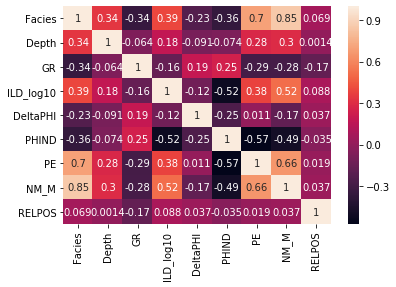

In [55]:
sns.heatmap(df.corr(), annot=True);

In [111]:
#using 8 wells as training data
train_well = df

#feature selection for training data
feature = ['GR', 'ILD_log10','DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
X = train_well[feature]
y = train_well['Facies']

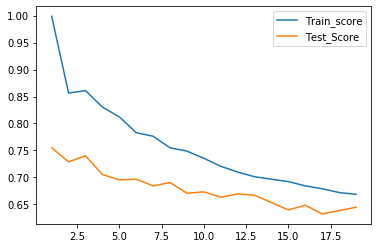

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#scaliing the data into the same range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

train_score = []
test_score = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
plt.plot(range(1,20), train_score, label='Train_score')
plt.plot(range(1,20), test_score, label='Test_Score')
plt.legend();

KNN Method only gives below 75% accuracy in testing data

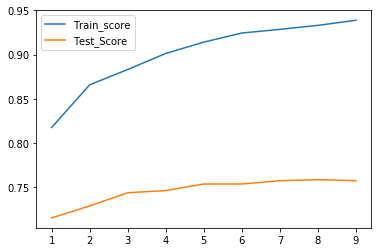

In [108]:
from sklearn.svm import SVC

train_score = []
test_score = []
for c in range(1,10):
    svc = SVC(C=c, gamma=1)
    svc.fit(X_train, y_train)
    train_score.append(svc.score(X_train, y_train))
    test_score.append(svc.score(X_test, y_test))
plt.plot(range(1,10), train_score, label='Train_score')
plt.plot(range(1,10), test_score, label='Test_Score')
plt.legend();

In [109]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, max_depth=6)
clf.fit(X_train, y_train)
print('training accuracy',clf.score(X_train, y_train))
print('testing accuracy', clf.score(X_test, y_test))


training accuracy 0.6534653465346535
testing accuracy 0.5841584158415841


In [110]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Gaus = GaussianNB()
Gaus.fit(X_train, y_train)
print('training accuracy',Gaus.score(X_train, y_train))
print('testing accuracy', Gaus.score(X_test, y_test))

training accuracy 0.19265676567656767
testing accuracy 0.18193069306930693
